In [34]:
import json
import matplotlib.pyplot as plt
from numpy import array, zeros
from scipy.misc import imread, imsave
from glob import glob
from PIL import Image

In [45]:
from tifffile import imsave

This is to read the tiff images of the actual image sequence. But this is not necessary for image drawing. It is however necessary to get the correct shape to make our mask.

In [4]:
files = sorted(glob('/home/pelonomi/deep-calcium-datasets/neurofinder.00.02/images/*.tiff'))
imgs = array([imread(f) for f in files])
dims = imgs.shape[1:]

In [7]:
def tomask(coords):
    mask = zeros(dims)
    for cord in coords:
        mask[cord[0]][cord[1]] = 1
    return mask

Load regions from region file. Each region is in a new plane so we have to stack each plane for all the regions to appear in the same image

In [78]:
with open('/home/pelonomi/deep-calcium-datasets/neurofinder.00.02/regions/regions.json') as f:
    regions = json.load(f)

In [79]:
masks = array([tomask(s['coordinates']) for s in regions])

In [80]:
result = masks.sum(axis=0)

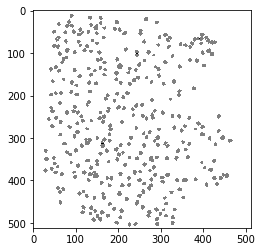

In [81]:
plt.figure()
plt.imshow(masks.sum(axis=0), cmap='binary')
plt.show()

Here we make an image stack of the masks so that we have a mask length that is the same as our image sequence length. AInt that great

In [82]:
multiimage = array([result for i in range(500)], 'uint16')
imsave('mask.tif',multiimage )

If we want just a single image in our tiff instead of an image stack then we just use this

In [ ]:
imsave('mask.tif',result )